<a href="https://colab.research.google.com/github/VICKYPATIL2525/ML_models/blob/main/dynamic_premium_final_project_file.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#WE DO NOT HAVE TO RUN THIS SCRIPT AGAIN, DATA IS GENERATED AND STORED ON GITHUB
#script used to generate the synthetic data
import pandas as pd edit this line
import numpy as np
import random

# Seed for reproducibility
np.random.seed(42)

# Constants
num_rows = 40000

# Define disease weights (from earlier)
disease_weights = {
    "Diabetes": 0.9, "Hypertension": 0.8, "Heart_Disease": 0.9, "Past_Heart_Attack": 1.0,
    "Cancer_Current": 1.0, "Cancer_Past": 0.9, "Kidney_Disease": 0.9, "Dialysis": 1.0,
    "Asthma_Mild": 0.4, "Asthma_Moderate": 0.6, "COPD": 0.8, "Thyroid_Hypo": 0.4,
    "Thyroid_Hyper": 0.5, "Epilepsy": 0.8, "Depression_Anxiety": 0.5, "Severe_Mental_Disorder": 0.9,
    "Obesity_BMI_30plus": 0.7, "PCOD_PCOS": 0.5, "Liver_Disease": 1.0, "HIV_AIDS": 1.0,
    "Tuberculosis_Recovered": 0.5, "COVID_Post_Complications": 0.6, "Stroke_Past": 1.0,
    "Surgery_Appendix": 0.3, "Surgery_Hernia": 0.3, "Autoimmune_Disease": 0.9
}

# Disease columns
disease_cols = list(disease_weights.keys())

# Probabilities for each disease (simulate Indian population)
disease_probs = {
    "Diabetes": 0.15, "Hypertension": 0.12, "Heart_Disease": 0.08, "Past_Heart_Attack": 0.03,
    "Cancer_Current": 0.01, "Cancer_Past": 0.02, "Kidney_Disease": 0.03, "Dialysis": 0.01,
    "Asthma_Mild": 0.1, "Asthma_Moderate": 0.06, "COPD": 0.04, "Thyroid_Hypo": 0.07,
    "Thyroid_Hyper": 0.03, "Epilepsy": 0.01, "Depression_Anxiety": 0.12, "Severe_Mental_Disorder": 0.01,
    "Obesity_BMI_30plus": 0.16, "PCOD_PCOS": 0.08, "Liver_Disease": 0.02, "HIV_AIDS": 0.005,
    "Tuberculosis_Recovered": 0.05, "COVID_Post_Complications": 0.1, "Stroke_Past": 0.02,
    "Surgery_Appendix": 0.1, "Surgery_Hernia": 0.07, "Autoimmune_Disease": 0.02
}

# Generate data
data = {
    "Age": np.random.randint(18, 80, size=num_rows),
    "Gender": np.random.choice(["Male", "Female"], size=num_rows),
    "Region": np.random.choice(["Urban", "Semi-Urban", "Rural"], size=num_rows, p=[0.5, 0.3, 0.2]),
    "Occupation": np.random.choice(["Salaried", "Self-Employed", "Unemployed", "Student", "Retired"], size=num_rows, p=[0.4, 0.3, 0.1, 0.1, 0.1]),
    "BMI": np.round(np.random.normal(24, 5, size=num_rows), 1)
}

# Add diseases with respective probabilities
for disease, prob in disease_probs.items():
    data[disease] = np.random.choice([1, 0], size=num_rows, p=[prob, 1 - prob])

# Compute total weight
total_weight = []
for i in range(num_rows):
    w = sum([data[disease][i] * disease_weights[disease] for disease in disease_cols])
    total_weight.append(round(w, 2))
data["Total_Weight"] = total_weight

# Premium calculation based on weight and a base rate
base_premium = 5000
data["Premium_Amount_INR_per_Year"] = [int(base_premium + w * 6000 + random.randint(-1000, 1000)) for w in total_weight]

# Assemble DataFrame
df_large = pd.DataFrame(data)

# Save to CSV
file_path = "/content/fresh data.csv"
df_large.to_csv(file_path, index=False)

file_path


'/content/fresh data.csv'

In [ ]:
#ACCESSING THE DATA THROUGH GITHUB REPO
url = 'https://raw.githubusercontent.com/VICKYPATIL2525/Datasets/refs/heads/main/fresh%20data.csv'
df = pd.read_csv(url, encoding='unicode_escape')

In [ ]:
df

,Age,Gender,Region,Occupation,BMI,Diabetes,Hypertension,Heart_Disease,Past_Heart_Attack,Cancer_Current,...,Liver_Disease,HIV_AIDS,Tuberculosis_Recovered,COVID_Post_Complications,Stroke_Past,Surgery_Appendix,Surgery_Hernia,Autoimmune_Disease,Total_Weight,Premium_Amount_INR_per_Year
0,56,Male,Urban,Self-Employed,28.4,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0.5,8050
1,69,Male,Urban,Self-Employed,24.2,1,1,0,0,0,...,0,0,1,0,0,0,0,0,3.1,23706
2,46,Male,Urban,Salaried,18.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,4314
3,32,Female,Urban,Self-Employed,26.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1.4,13864
4,60,Male,Rural,Unemployed,26.8,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1.5,14474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,32,Female,Semi-Urban,Self-Employed,19.4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.4,7520
39996,62,Female,Semi-Urban,Unemployed,17.1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1.3,13033
39997,54,Female,Urban,Salaried,22.3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.4,6445
39998,22,Female,Urban,Unemployed,34.3,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1.1,11446


In [ ]:
#EDA

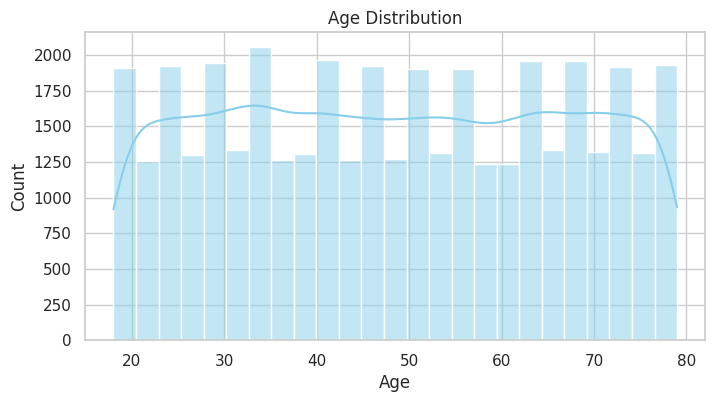

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")



# Set plot style
sns.set(style="whitegrid")

# -------------------------------
# 1. AGE Distribution
plt.figure(figsize=(8, 4))
sns.histplot(df["Age"], bins=25, kde=True, color="skyblue")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.show()


In [ ]:
df["BMI"] = df["BMI"].clip(lower=16, upper=40)

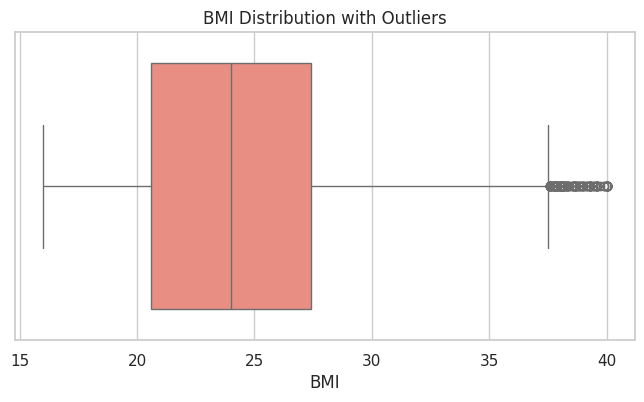

In [ ]:
# 2. BMI Distribution + Outliers
plt.figure(figsize=(8, 4))
sns.boxplot(x=df["BMI"], color="salmon")
plt.title("BMI Distribution with Outliers")
plt.xlabel("BMI")
plt.show()

In [ ]:
# 2. Cap premium amount at ₹60,000 (remove extreme outliers)
df["Premium_Amount_INR_per_Year"] = df["Premium_Amount_INR_per_Year"].clip(upper=60000)

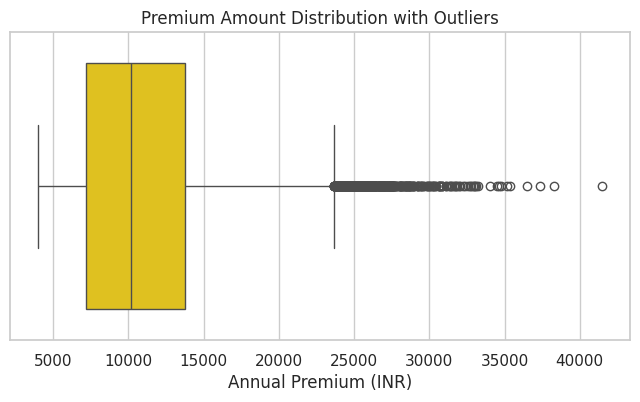

In [ ]:
# 3. PREMIUM Distribution + Outliers
plt.figure(figsize=(8, 4))
sns.boxplot(x=df["Premium_Amount_INR_per_Year"], color="gold")
plt.title("Premium Amount Distribution with Outliers")
plt.xlabel("Annual Premium (INR)")
plt.show()

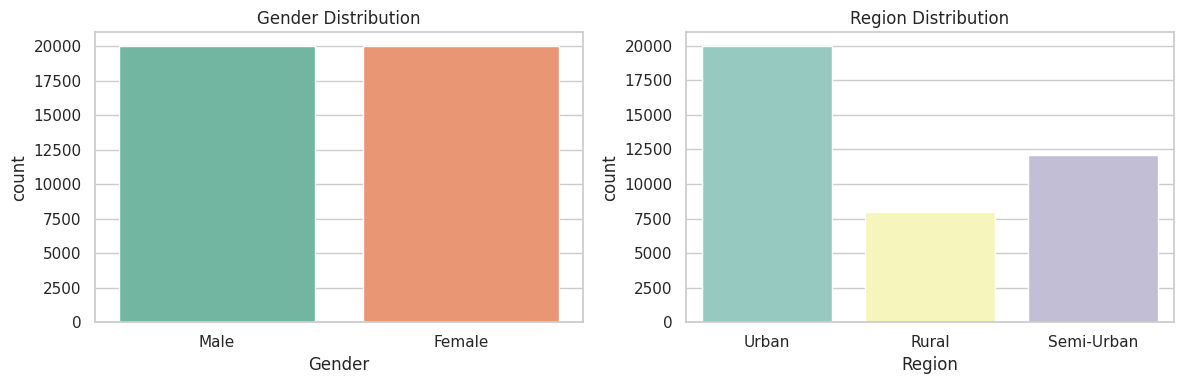

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.countplot(data=df, x="Gender", ax=ax[0], palette="Set2")
ax[0].set_title("Gender Distribution")

sns.countplot(data=df, x="Region", ax=ax[1], palette="Set3")
ax[1].set_title("Region Distribution")
plt.tight_layout()
plt.show()

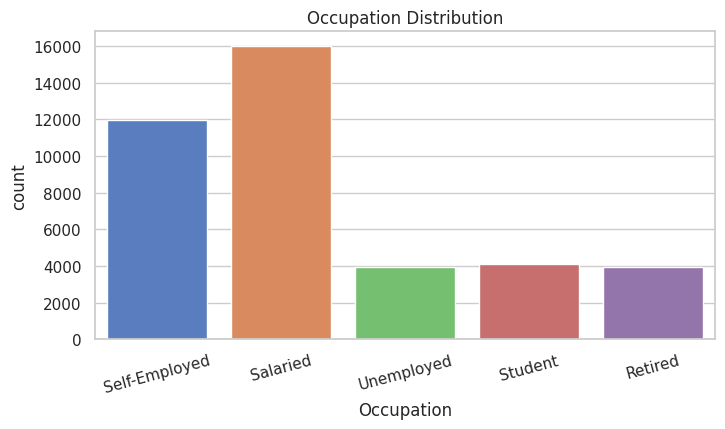

In [ ]:
# -------------------------------
# 5. OCCUPATION Counts
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x="Occupation", palette="muted")
plt.title("Occupation Distribution")
plt.xticks(rotation=15)
plt.show()

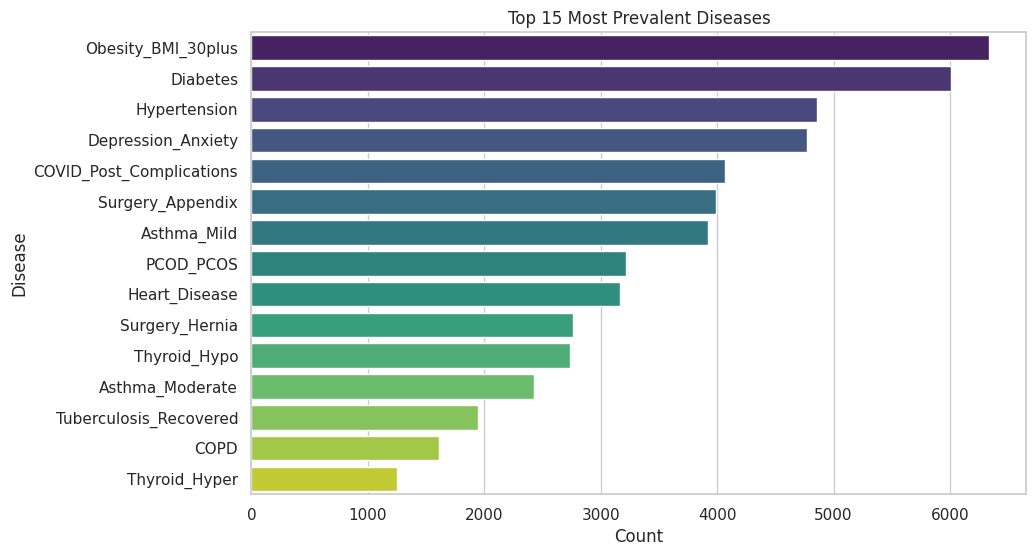

In [ ]:
# -------------------------------
# 7. Disease Count Summary
disease_cols = [col for col in df.columns if col not in ["Age", "Gender", "Region", "Occupation", "BMI", "Total_Weight", "Premium_Amount_INR_per_Year"]]
disease_counts = df[disease_cols].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=disease_counts.values[:15], y=disease_counts.index[:15], palette="viridis")
plt.title("Top 15 Most Prevalent Diseases")
plt.xlabel("Count")
plt.ylabel("Disease")
plt.show()

In [ ]:

# 1. Manual Label Encoding

# Gender: Male = 1, Female = 0
df["Gender"] = df["Gender"].map({"Female": 0, "Male": 1})

# Region: Urban = 2, Semi-Urban = 1, Rural = 0
df["Region"] = df["Region"].map({"Rural": 0, "Semi-Urban": 1, "Urban": 2})

# Occupation: Manual encoding (you can adjust if needed)
occupation_mapping = {
    "Student": 0,
    "Unemployed": 1,
    "Retired": 2,
    "Self-Employed": 3,
    "Salaried": 4
}
df["Occupation"] = df["Occupation"].map(occupation_mapping)


✅ RMSE: 1164.78
✅ R² Score: 0.9419


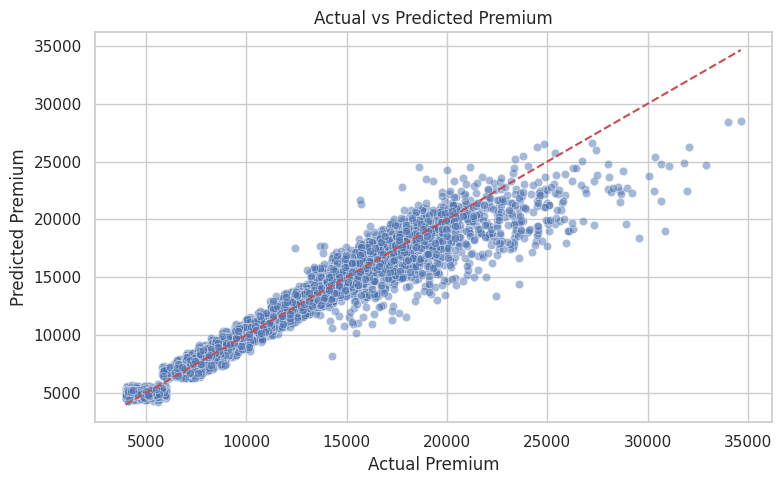

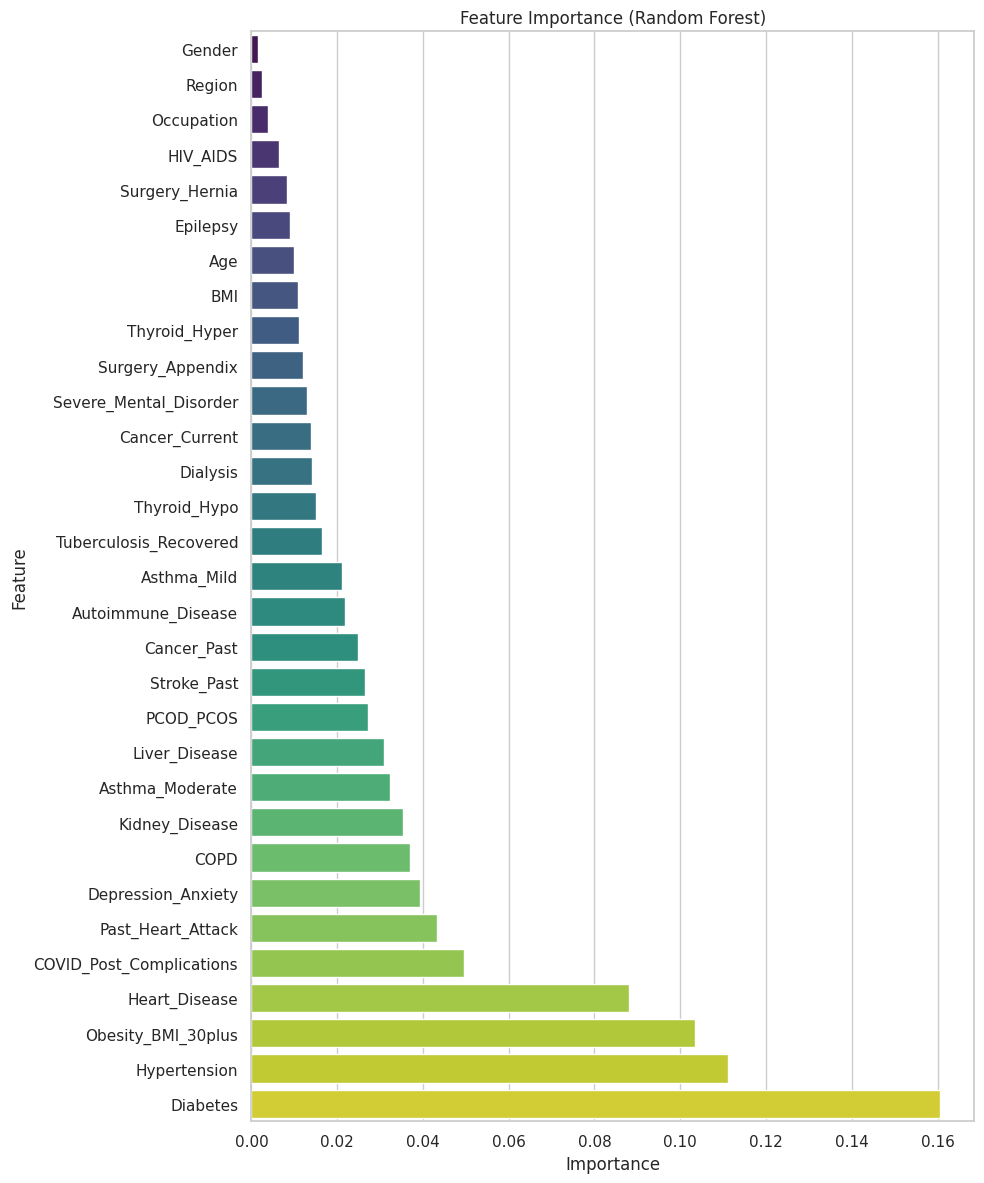

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


# 1. Define Features (X) and Target (y)
feature_cols = [col for col in df.columns if col not in ["Premium_Amount_INR_per_Year", "Log_Premium", "Total_Weight"]]
X = df[feature_cols]
y = df["Premium_Amount_INR_per_Year"]

# 2. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train the Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
i

print(f"✅ RMSE: {rmse:.2f}")
print(f"✅ R² Score: {r2:.4f}")

# 5. Plot Actual vs Predicted
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Premium")
plt.ylabel("Predicted Premium")
plt.title("Actual vs Predicted Premium")
plt.tight_layout()
plt.show()

# 6. Feature Importance
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({"Feature": X.columns, "Importance": importances})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=True)

# Plot feature importances
plt.figure(figsize=(10, 12))
sns.barplot(data=feature_importance_df, x="Importance", y="Feature", palette="viridis")
plt.title("Feature Importance (Random Forest)")
plt.tight_layout()
plt.show()


In [ ]:
import joblib

# Save the trained model
joblib.dump(model, 'insurance_premium_model.pkl')

# Save the feature columns used
joblib.dump(feature_cols, 'feature_columns.pkl')


['feature_columns.pkl']

In [38]:
#SCRIPT TO CREATE THE INPUT, PRINT IT AND APPLY THE MODEL OVER IT
import pandas as pd
import numpy as np
import joblib
import random

# ---------------------------
# Load model and features
model = joblib.load("insurance_premium_model.pkl")
feature_cols = joblib.load("feature_columns.pkl")

# ---------------------------
# Random input generation function
def generate_random_input():
    return {
        "Age": random.randint(18, 75),
        "Gender": random.choice(["Male", "Female"]),
        "Region": random.choices(["Urban", "Semi-Urban", "Rural"], weights=[0.5, 0.3, 0.2])[0],
        "Occupation": random.choices(
            ["Salaried", "Self-Employed", "Unemployed", "Student", "Retired"],
            weights=[0.4, 0.3, 0.1, 0.1, 0.1]
        )[0],
        "BMI": round(np.random.normal(24, 5), 1),
        "Diabetes": random.choices([1, 0], weights=[0.15, 0.85])[0],
        "Hypertension": random.choices([1, 0], weights=[0.12, 0.88])[0],
        "Heart_Disease": random.choices([1, 0], weights=[0.08, 0.92])[0],
        "Past_Heart_Attack": random.choices([1, 0], weights=[0.03, 0.97])[0],
        "Cancer_Current": random.choices([1, 0], weights=[0.01, 0.99])[0],
        "Cancer_Past": random.choices([1, 0], weights=[0.02, 0.98])[0],
        "Kidney_Disease": random.choices([1, 0], weights=[0.03, 0.97])[0],
        "Dialysis": random.choices([1, 0], weights=[0.01, 0.99])[0],
        "Asthma_Mild": random.choices([1, 0], weights=[0.10, 0.90])[0],
        "Asthma_Moderate": random.choices([1, 0], weights=[0.06, 0.94])[0],
        "COPD": random.choices([1, 0], weights=[0.04, 0.96])[0],
        "Thyroid_Hypo": random.choices([1, 0], weights=[0.07, 0.93])[0],
        "Thyroid_Hyper": random.choices([1, 0], weights=[0.03, 0.97])[0],
        "Epilepsy": random.choices([1, 0], weights=[0.01, 0.99])[0],
        "Depression_Anxiety": random.choices([1, 0], weights=[0.12, 0.88])[0],
        "Severe_Mental_Disorder": random.choices([1, 0], weights=[0.01, 0.99])[0],
        "Obesity_BMI_30plus": random.choices([1, 0], weights=[0.16, 0.84])[0],
        "PCOD_PCOS": random.choices([1, 0], weights=[0.08, 0.92])[0],
        "Liver_Disease": random.choices([1, 0], weights=[0.02, 0.98])[0],
        "HIV_AIDS": random.choices([1, 0], weights=[0.005, 0.995])[0],
        "Tuberculosis_Recovered": random.choices([1, 0], weights=[0.05, 0.95])[0],
        "COVID_Post_Complications": random.choices([1, 0], weights=[0.10, 0.90])[0],
        "Stroke_Past": random.choices([1, 0], weights=[0.02, 0.98])[0],
        "Surgery_Appendix": random.choices([1, 0], weights=[0.10, 0.90])[0],
        "Surgery_Hernia": random.choices([1, 0], weights=[0.07, 0.93])[0],
        "Autoimmune_Disease": random.choices([1, 0], weights=[0.02, 0.98])[0],
    }

# ---------------------------
# Generate random input
user_input = generate_random_input()

# Print input
print("\n🧾 Randomly Generated Input:")
for k, v in user_input.items():
    print(f"{k}: {v}")

# ---------------------------
# Create DataFrame
df_input = pd.DataFrame([user_input])

# Encode categorical variables
df_input["Gender"] = df_input["Gender"].map({"Female": 0, "Male": 1})
df_input["Region"] = df_input["Region"].map({"Rural": 0, "Semi-Urban": 1, "Urban": 2})
df_input["Occupation"] = df_input["Occupation"].map({
    "Student": 0, "Unemployed": 1, "Retired": 2, "Self-Employed": 3, "Salaried": 4
})

# Select model features
X_input = df_input[feature_cols]

# Predict
predicted_premium = model.predict(X_input)[0]

# Output
print(f"\n💰 Predicted Annual Insurance Premium: ₹{predicted_premium:,.2f}")



🧾 Randomly Generated Input:
Age: 38
Gender: Male
Region: Urban
Occupation: Salaried
BMI: 32.0
Diabetes: 0
Hypertension: 0
Heart_Disease: 0
Past_Heart_Attack: 0
Cancer_Current: 0
Cancer_Past: 0
Kidney_Disease: 0
Dialysis: 0
Asthma_Mild: 0
Asthma_Moderate: 0
COPD: 0
Thyroid_Hypo: 0
Thyroid_Hyper: 0
Epilepsy: 0
Depression_Anxiety: 0
Severe_Mental_Disorder: 0
Obesity_BMI_30plus: 0
PCOD_PCOS: 0
Liver_Disease: 0
HIV_AIDS: 0
Tuberculosis_Recovered: 0
COVID_Post_Complications: 0
Stroke_Past: 0
Surgery_Appendix: 0
Surgery_Hernia: 0
Autoimmune_Disease: 0

💰 Predicted Annual Insurance Premium: ₹5,145.29
